In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib as mpl
import tensorflow as tf
from tqdm import tqdm

import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import BatchNormalization

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 1. Single point regression

In [2]:
df= pd.read_csv(r"C:\Users\MMIL\DP_LSTM\DP_phase_tofit_F1F2M.csv")
df.head()
df.tail()

,time,Ferrite_1,Ferrite_2,Martensite
5,55.0,-208.75050,16.74224,66.44508
6,60.0,-224.60015,-0.30227,74.38740
7,75.0,-235.34112,-16.03921,128.39521
8,83.0,-163.16005,1.90168,156.95441
9,97.0,-157.44593,-6.83711,155.23157


In [3]:
time_x = (np.array(df["time"]))
time_x2 = (np.array(df["time"]))
time_x2 = np.append(time_x2, 108.0)
time_x2 = np.append(time_x2, 121.0)

y_f1 = df["Ferrite_1"]
y_f2 = df["Ferrite_2"]
y_m1 = df["Martensite"]

print(time_x)
print(time_x2)

[ 0.1  5.  25.  33.  43.  55.  60.  75.  83.  97. ]
[1.00e-01 5.00e+00 2.50e+01 3.30e+01 4.30e+01 5.50e+01 6.00e+01 7.50e+01
 8.30e+01 9.70e+01 1.08e+02 1.21e+02]


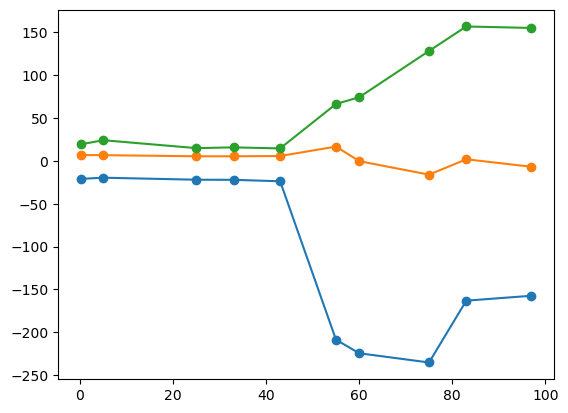

In [4]:
plt.plot(time_x, y_f1, 'o-')
plt.plot(time_x, y_f2, 'o-')
plt.plot(time_x, y_m1, 'o-')

# 1.1 Linear regression

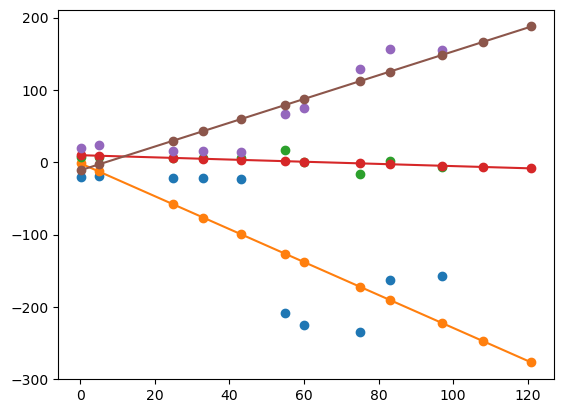

In [5]:
import numpy as np

def linear_fit(x, y, x2):
    # Perform linear regression
    slope, intercept = np.polyfit(x, y, 1)
    
    # Calculate the y values using the fitted line equation
    y_fitted = slope * np.array(x) + intercept
    y2_fitted = slope * np.array(x2) + intercept
    
    # Return the y vector
    return y_fitted, y2_fitted

y_f1_fitted, y2_f1_fitted = linear_fit(time_x, y_f1, time_x2)
y_f2_fitted, y2_f2_fitted = linear_fit(time_x, y_f2, time_x2)
y_m1_fitted, y2_m1_fitted = linear_fit(time_x, y_m1, time_x2)


plt.plot(time_x, y_f1, 'o')
plt.plot(time_x2, y2_f1_fitted, '-o')

plt.plot(time_x, y_f2, 'o')
plt.plot(time_x2, y2_f2_fitted, '-o')

plt.plot(time_x, y_m1, 'o')
plt.plot(time_x2, y2_m1_fitted, '-o')

# Save csv. file
data = {
    'time_x': time_x,
    'yf1': y_f1,
    'yf2': y_f2,
    'ym1': y_m1,
    'y2_f1_fitted': y_f1_fitted,
    'y2_f2_fitted': y_f2_fitted,
    'y2_m1_fitted': y_m1_fitted,
    'yf1_err': np.abs(y_f1 - y_f1_fitted),
    'yf2_err': np.abs(y_f2 - y_f2_fitted),
    'ym1_err': np.abs(y_m1 - y_m1_fitted),
    'yf1_mae': np.mean(np.abs(y_f1 - y_f1_fitted)),
    'yf2_mae': np.mean(np.abs(y_f2 - y_f2_fitted)),
    'ym1_mae': np.mean(np.abs(y_m1 - y_m1_fitted)),
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_filename = r'C:\Users\MMIL\DP_LSTM\Pred_Model_Fig2\linear_fit.csv'
df.to_csv(csv_filename, index=False)



# Save csv. file pred plus 2
data = {
    'time_x': time_x2,
    'y2_f1_fitted': y2_f1_fitted,
    'y2_f2_fitted': y2_f2_fitted,
    'y2_m1_fitted': y2_m1_fitted,
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_filename = r'C:\Users\MMIL\DP_LSTM\Pred_Model_Fig2\linear_fit_plus.csv'
df.to_csv(csv_filename, index=False)


# 1.2 Supporting Vector Machine regression

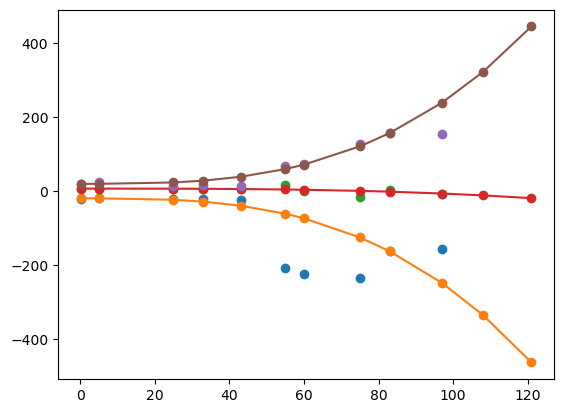

In [6]:
from sklearn.svm import SVR

def svr_linear_fit(x, y, x2):
    # Reshape the x data into a 2D array
    x_reshaped = np.array(x).reshape(-1, 1)
    x2_reshaped = np.array(x2).reshape(-1, 1)
    
    # Initialize the SVR model
    svr_regressor = SVR(kernel='poly')
    
    # Fit the SVR model to the data
    svr_regressor.fit(x_reshaped, y)
    
    # Use the trained SVR model to predict y values
    y_fitted = svr_regressor.predict(x_reshaped)
    y2_fitted = svr_regressor.predict(x2_reshaped)
    
    # Return the y vector
    return y_fitted, y2_fitted

y_f1_fitted, y2_f1_fitted = svr_linear_fit(time_x, y_f1, time_x2)
y_f2_fitted, y2_f2_fitted = svr_linear_fit(time_x, y_f2, time_x2)
y_m1_fitted, y2_m1_fitted = svr_linear_fit(time_x, y_m1, time_x2)


plt.plot(time_x, y_f1, 'o')
plt.plot(time_x2, y2_f1_fitted, '-o')

plt.plot(time_x, y_f2, 'o')
plt.plot(time_x2, y2_f2_fitted, '-o')

plt.plot(time_x, y_m1, 'o')
plt.plot(time_x2, y2_m1_fitted, '-o')


# Save csv. file
data = {
    'time_x': time_x,
    'yf1': y_f1,
    'yf2': y_f2,
    'ym1': y_m1,
    'y2_f1_fitted': y_f1_fitted,
    'y2_f2_fitted': y_f2_fitted,
    'y2_m1_fitted': y_m1_fitted,
    'yf1_err': np.abs(y_f1 - y_f1_fitted),
    'yf2_err': np.abs(y_f2 - y_f2_fitted),
    'ym1_err': np.abs(y_m1 - y_m1_fitted),
    'yf1_mae': np.mean(np.abs(y_f1 - y_f1_fitted)),
    'yf2_mae': np.mean(np.abs(y_f2 - y_f2_fitted)),
    'ym1_mae': np.mean(np.abs(y_m1 - y_m1_fitted)),
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_filename = r'C:\Users\MMIL\DP_LSTM\Pred_Model_Fig2\svr_fit.csv'
df.to_csv(csv_filename, index=False)


# Save csv. file pred plus 2
data = {
    'time_x': time_x2,
    'y2_f1_fitted': y2_f1_fitted,
    'y2_f2_fitted': y2_f2_fitted,
    'y2_m1_fitted': y2_m1_fitted,
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_filename = r'C:\Users\MMIL\DP_LSTM\Pred_Model_Fig2\svr_fit_plus.csv'
df.to_csv(csv_filename, index=False)

# 1.3 Random Forest regression

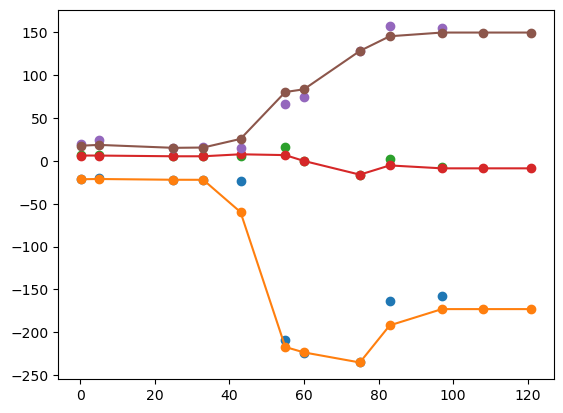

In [7]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_linear_fit(x, y, x2):
    # Reshape the x data into a 2D array
    x_reshaped = np.array(x).reshape(-1, 1)
    x2_reshaped = np.array(x2).reshape(-1, 1)
    
    # Initialize the Random Forest Regressor
    rf_regressor = RandomForestRegressor(n_estimators=5, random_state=42)
    
    # Fit the regressor to the data
    rf_regressor.fit(x_reshaped, y)
    
    # Use the trained regressor to predict y values
    y_fitted = rf_regressor.predict(x_reshaped)
    y2_fitted = rf_regressor.predict(x2_reshaped)
    
    # Return the y vector
    return y_fitted, y2_fitted

y_f1_fitted, y2_f1_fitted = random_forest_linear_fit(time_x, y_f1, time_x2)
y_f2_fitted, y2_f2_fitted = random_forest_linear_fit(time_x, y_f2, time_x2)
y_m1_fitted, y2_m1_fitted = random_forest_linear_fit(time_x, y_m1, time_x2)


plt.plot(time_x, y_f1, 'o')
plt.plot(time_x2, y2_f1_fitted, '-o')

plt.plot(time_x, y_f2, 'o')
plt.plot(time_x2, y2_f2_fitted, '-o')

plt.plot(time_x, y_m1, 'o')
plt.plot(time_x2, y2_m1_fitted, '-o')


# Save csv. file
data = {
    'time_x': time_x,
    'yf1': y_f1,
    'yf2': y_f2,
    'ym1': y_m1,
    'y2_f1_fitted': y_f1_fitted,
    'y2_f2_fitted': y_f2_fitted,
    'y2_m1_fitted': y_m1_fitted,
    'yf1_err': np.abs(y_f1 - y_f1_fitted),
    'yf2_err': np.abs(y_f2 - y_f2_fitted),
    'ym1_err': np.abs(y_m1 - y_m1_fitted),
    'yf1_mae': np.mean(np.abs(y_f1 - y_f1_fitted)),
    'yf2_mae': np.mean(np.abs(y_f2 - y_f2_fitted)),
    'ym1_mae': np.mean(np.abs(y_m1 - y_m1_fitted)),
}


# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_filename = r'C:\Users\MMIL\DP_LSTM\Pred_Model_Fig2\random_forest_fit.csv'
df.to_csv(csv_filename, index=False)


# Save csv. file pred plus 2
data = {
    'time_x': time_x2,
    'y2_f1_fitted': y2_f1_fitted,
    'y2_f2_fitted': y2_f2_fitted,
    'y2_m1_fitted': y2_m1_fitted,
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_filename = r'C:\Users\MMIL\DP_LSTM\Pred_Model_Fig2\random_forest_fit_plus.csv'
df.to_csv(csv_filename, index=False)


# 1.4 K-nearest neigbhor regression

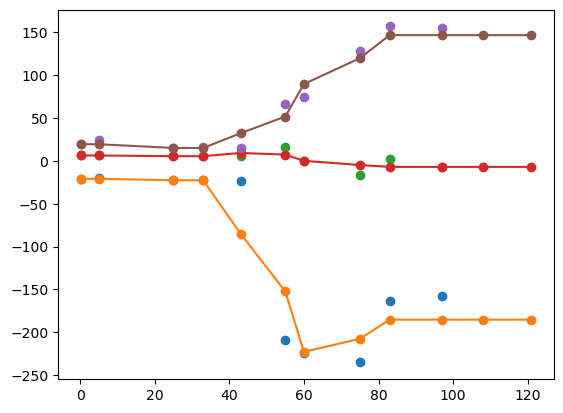

In [8]:
from sklearn.neighbors import KNeighborsRegressor

def knn_linear_fit(x, y, x2):
    # Reshape the x data into a 2D array
    x_reshaped = np.array(x).reshape(-1, 1)
    x2_reshaped = np.array(x2).reshape(-1, 1)
    
    # Initialize the KNN regressor
    knn_regressor = KNeighborsRegressor(n_neighbors=3)
    
    # Fit the KNN regressor to the data
    knn_regressor.fit(x_reshaped, y)
    
    # Use the trained KNN regressor to predict y values
    y_fitted = knn_regressor.predict(x_reshaped)
    y2_fitted = knn_regressor.predict(x2_reshaped)
    
    # Return the y vector
    return y_fitted, y2_fitted


y_f1_fitted, y2_f1_fitted = knn_linear_fit(time_x, y_f1, time_x2)
y_f2_fitted, y2_f2_fitted = knn_linear_fit(time_x, y_f2, time_x2)
y_m1_fitted, y2_m1_fitted = knn_linear_fit(time_x, y_m1, time_x2)


plt.plot(time_x, y_f1, 'o')
plt.plot(time_x2, y2_f1_fitted, '-o')

plt.plot(time_x, y_f2, 'o')
plt.plot(time_x2, y2_f2_fitted, '-o')

plt.plot(time_x, y_m1, 'o')
plt.plot(time_x2, y2_m1_fitted, '-o')

# Save csv. file
data = {
    'time_x': time_x,
    'yf1': y_f1,
    'yf2': y_f2,
    'ym1': y_m1,
    'y2_f1_fitted': y_f1_fitted,
    'y2_f2_fitted': y_f2_fitted,
    'y2_m1_fitted': y_m1_fitted,
    'yf1_err': np.abs(y_f1 - y_f1_fitted),
    'yf2_err': np.abs(y_f2 - y_f2_fitted),
    'ym1_err': np.abs(y_m1 - y_m1_fitted),
    'yf1_mae': np.mean(np.abs(y_f1 - y_f1_fitted)),
    'yf2_mae': np.mean(np.abs(y_f2 - y_f2_fitted)),
    'ym1_mae': np.mean(np.abs(y_m1 - y_m1_fitted)),
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_filename = r'C:\Users\MMIL\DP_LSTM\Pred_Model_Fig2\knn_fit.csv'
df.to_csv(csv_filename, index=False)


# Save csv. file pred plus 2
data = {
    'time_x': time_x2,
    'y2_f1_fitted': y2_f1_fitted,
    'y2_f2_fitted': y2_f2_fitted,
    'y2_m1_fitted': y2_m1_fitted,
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_filename = r'C:\Users\MMIL\DP_LSTM\Pred_Model_Fig2\knn_fit_plus.csv'
df.to_csv(csv_filename, index=False)

# 2. Regressions for allpoint in the image: Spatial map regression

# 2.1 load the data with high normalization

221.89615820895517


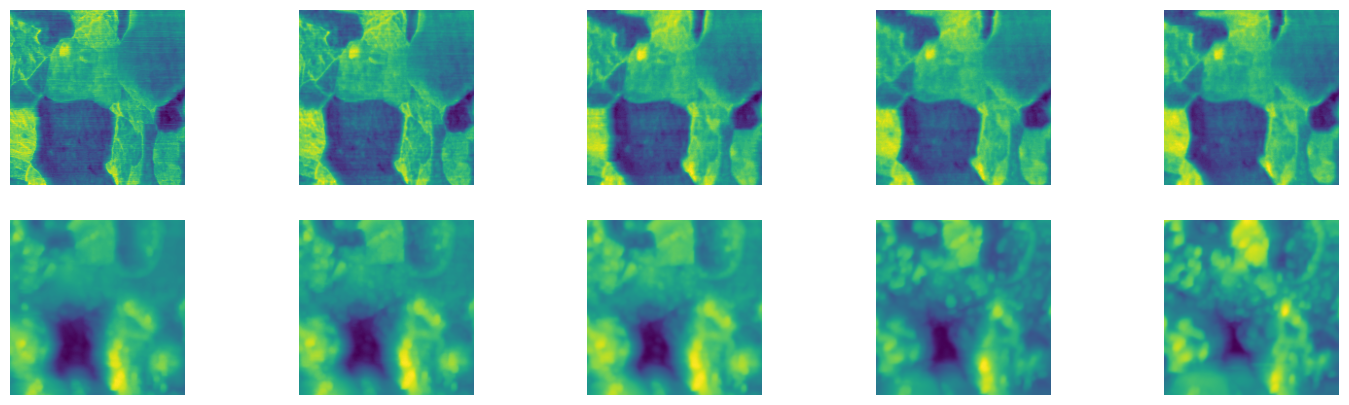

In [9]:
topo_3D = sio.loadmat(r'C:\Users\MMIL\DP_LSTM\ConvLSTM_dp_steel_data\Raw_topo_0-97min.mat')['Raw_topo3']
rows, cols, images = topo_3D.shape

absolute_maximum = np.max(topo_3D, axis = (0,1,2))
print(absolute_maximum)

topo_3D_norm = topo_3D / absolute_maximum

def seeimage(n=0):
    image = np.squeeze(np.squeeze(topo_3D_norm[:,:,n]))
    #image = np.rot90(image, k=1, axes=(0, 1))
    return image

fig2 = plt.figure(figsize=(18,5)) 
for image in range(images):
    fig2.add_subplot(2,int((images+1)/2), image+1)
    plt.imshow(seeimage(image))
    plt.axis('off')
    #plt.tight_layout();plt.clim(0,1);plt.title(str(image))
    
# fig3 = plt.figure(figsize=(18,5)) 
# for image in range(images):    
#     fig3.add_subplot(2,int((images+1)/2), image+1)
#     plt.hist(seeimage(image),range=[0,1])

# 2.2 linear_fit

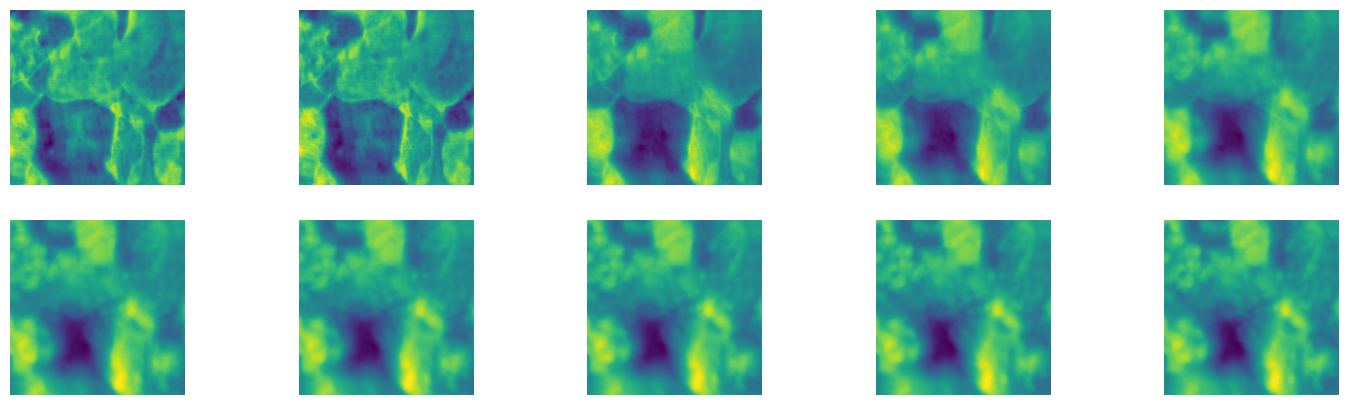

In [10]:
pred_vec = np.zeros((rows, cols, images))
pred_vec_plus = np.zeros((rows, cols, images+2))

for row in range(rows):
    for col in range(cols):
        yvec = np.array(np.squeeze(topo_3D[row,col,:]))
        #print(yvec)
        #print(time_x)
        
        yvec_fitted, yvec_plus_fitted = linear_fit(time_x, yvec, time_x2)
        #yvec_fitted, yvec_plus_fitted = svr_linear_fit(time_x, yvec, time_x2)
        #yvec_fitted, yvec_plus_fitted = random_forest_linear_fit(time_x, yvec, time_x2)
        #yvec_fitted, yvec_plus_fitted = knn_linear_fit(time_x, yvec, time_x2)

        pred_vec[row, col,:] = yvec_fitted
        pred_vec_plus[row, col,:] = yvec_plus_fitted


fig2 = plt.figure(figsize=(18,5)) 

def seeimage_pred(n=0):
    image = np.squeeze(np.squeeze(pred_vec[:,:,n]))
    #image = np.rot90(image, k=1, axes=(0, 1))
    return image

for image in range(images):
    fig2.add_subplot(2,int((images+1)/2), image+1)
    plt.imshow(seeimage_pred(image))
    plt.axis('off')

# 2.3 SVR

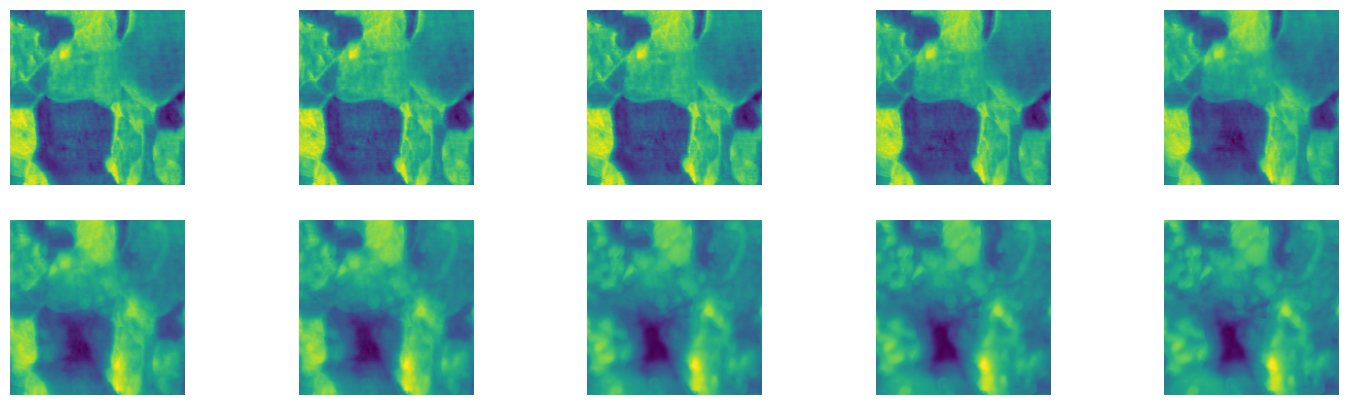

In [11]:
pred_vec = np.zeros((rows, cols, images))
pred_vec_plus = np.zeros((rows, cols, images+2))

for row in range(rows):
    for col in range(cols):
        yvec = np.array(np.squeeze(topo_3D[row,col,:]))
        #print(yvec)
        #print(time_x)
        
        #yvec_fitted, yvec_plus_fitted = linear_fit(time_x, yvec, time_x2)
        yvec_fitted, yvec_plus_fitted = svr_linear_fit(time_x, yvec, time_x2)
        #yvec_fitted, yvec_plus_fitted = random_forest_linear_fit(time_x, yvec, time_x2)
        #yvec_fitted, yvec_plus_fitted = knn_linear_fit(time_x, yvec, time_x2)

        pred_vec[row, col,:] = yvec_fitted
        pred_vec_plus[row, col,:] = yvec_plus_fitted


fig2 = plt.figure(figsize=(18,5)) 

def seeimage_pred(n=0):
    image = np.squeeze(np.squeeze(pred_vec[:,:,n]))
    #image = np.rot90(image, k=1, axes=(0, 1))
    return image

for image in range(images):
    fig2.add_subplot(2,int((images+1)/2), image+1)
    plt.imshow(seeimage_pred(image))
    plt.axis('off')

# 2.4 Random Forest

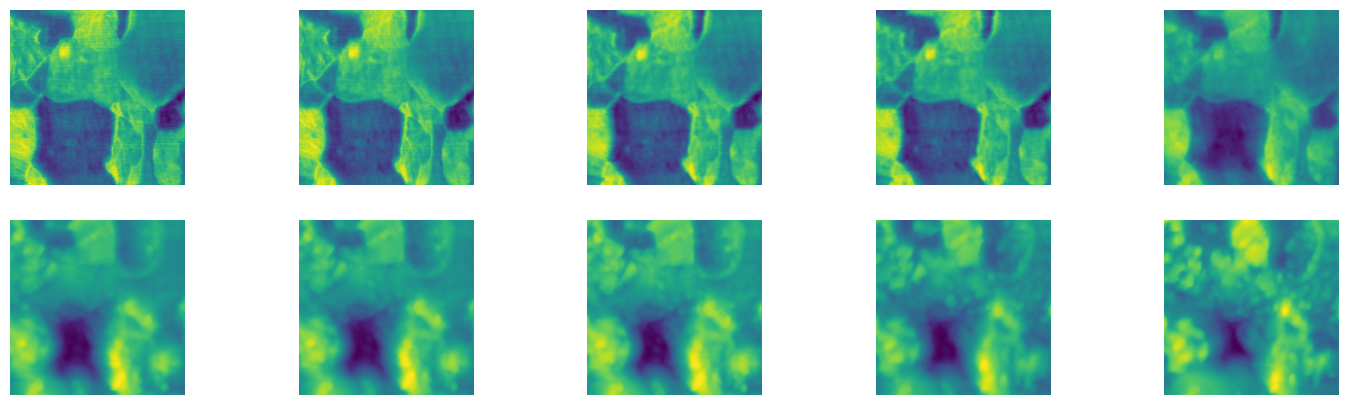

In [12]:
pred_vec = np.zeros((rows, cols, images))
pred_vec_plus = np.zeros((rows, cols, images+2))

for row in range(rows):
    for col in range(cols):
        yvec = np.array(np.squeeze(topo_3D[row,col,:]))
        #print(yvec)
        #print(time_x)
        
        #yvec_fitted, yvec_plus_fitted = linear_fit(time_x, yvec, time_x2)
        #yvec_fitted, yvec_plus_fitted = svr_linear_fit(time_x, yvec, time_x2)
        yvec_fitted, yvec_plus_fitted = random_forest_linear_fit(time_x, yvec, time_x2)
        #yvec_fitted, yvec_plus_fitted = knn_linear_fit(time_x, yvec, time_x2)

        pred_vec[row, col,:] = yvec_fitted
        pred_vec_plus[row, col,:] = yvec_plus_fitted


fig2 = plt.figure(figsize=(18,5)) 

def seeimage_pred(n=0):
    image = np.squeeze(np.squeeze(pred_vec[:,:,n]))
    #image = np.rot90(image, k=1, axes=(0, 1))
    return image

for image in range(images):
    fig2.add_subplot(2,int((images+1)/2), image+1)
    plt.imshow(seeimage_pred(image))
    plt.axis('off')

# 2.5 KNN 

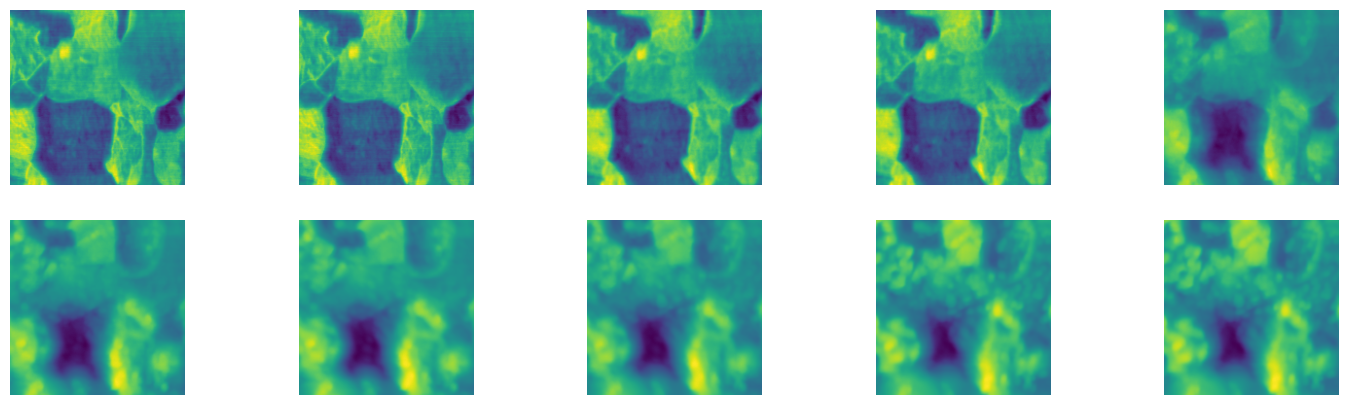

In [13]:
pred_vec = np.zeros((rows, cols, images))
pred_vec_plus = np.zeros((rows, cols, images+2))

for row in range(rows):
    for col in range(cols):
        yvec = np.array(np.squeeze(topo_3D[row,col,:]))
        #print(yvec)
        #print(time_x)
        
        #yvec_fitted, yvec_plus_fitted = linear_fit(time_x, yvec, time_x2)
        #yvec_fitted, yvec_plus_fitted = svr_linear_fit(time_x, yvec, time_x2)
        #yvec_fitted, yvec_plus_fitted = random_forest_linear_fit(time_x, yvec, time_x2)
        yvec_fitted, yvec_plus_fitted = knn_linear_fit(time_x, yvec, time_x2)

        pred_vec[row, col,:] = yvec_fitted
        pred_vec_plus[row, col,:] = yvec_plus_fitted


fig2 = plt.figure(figsize=(18,5)) 

def seeimage_pred(n=0):
    image = np.squeeze(np.squeeze(pred_vec[:,:,n]))
    #image = np.rot90(image, k=1, axes=(0, 1))
    return image

for image in range(images):
    fig2.add_subplot(2,int((images+1)/2), image+1)
    plt.imshow(seeimage_pred(image))
    plt.axis('off')

# 3. ConvLSTM Model

## 3.1 load data from .mat 

In [14]:
topo_3D = sio.loadmat(r'C:\Users\MMIL\DP_LSTM\ConvLSTM_dp_steel_data\Topo_55-121min_for_LSTM.mat')['Raw_topo1']
rows, cols, images = topo_3D.shape

# 3.2 Height normalization 

524.5509


C:\Users\MMIL\AppData\Local\Temp\ipykernel_28008\4206724160.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout();plt.clim(0,1);plt.title(str(image))


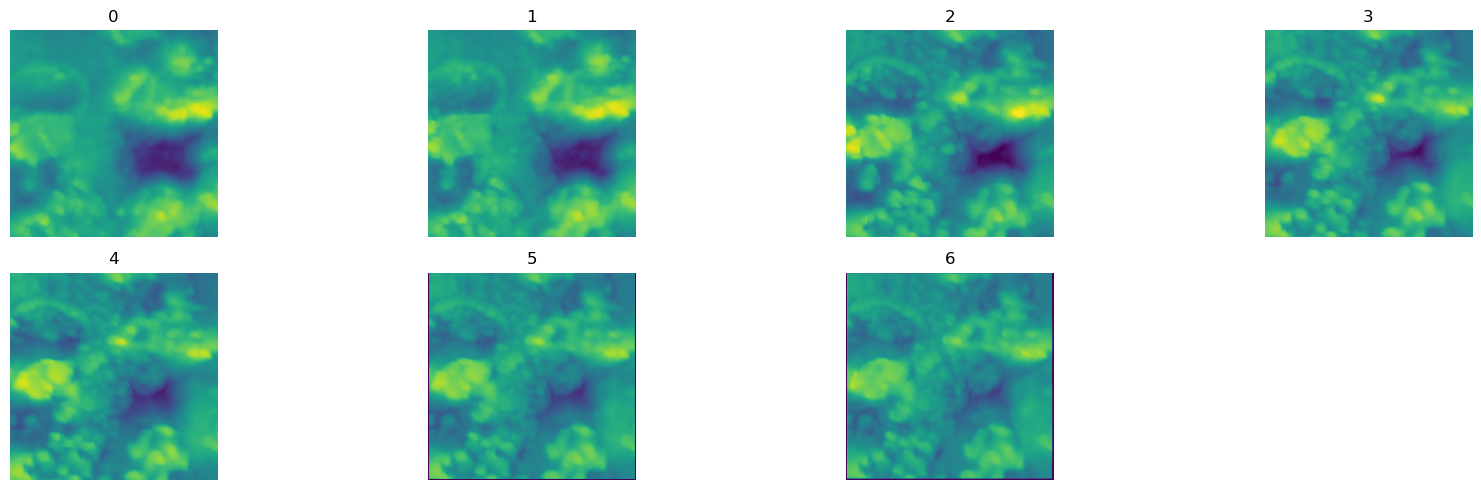

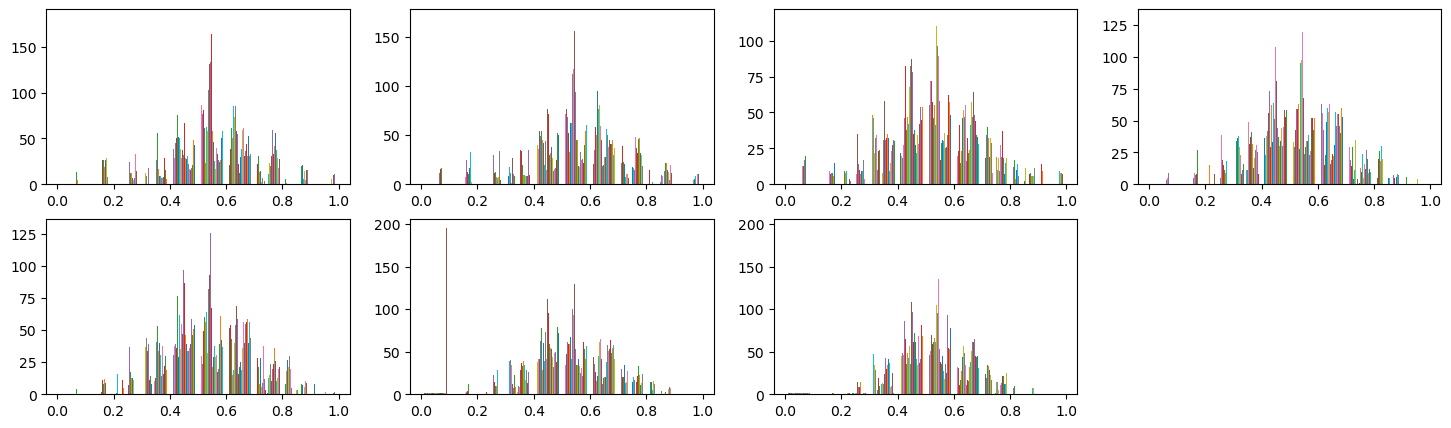

In [15]:
absolute_maximum = np.max(topo_3D, axis = (0,1,2))
print(absolute_maximum)

topo_3D_norm = topo_3D / absolute_maximum

def seeimage(n=0):
    image = np.squeeze(np.squeeze(topo_3D_norm[:,:,n]))
    image = np.rot90(image, k=1, axes=(0, 1))
    return image

fig2 = plt.figure(figsize=(18,5)) 
for image in range(images):
    fig2.add_subplot(2,int((images+1)/2), image+1);plt.imshow(seeimage(image));plt.axis('off')
    plt.tight_layout();plt.clim(0,1);plt.title(str(image))
    
fig3 = plt.figure(figsize=(18,5)) 
for image in range(images):    
    fig3.add_subplot(2,int((images+1)/2), image+1);plt.hist(seeimage(image),range=[0,1])

# 3.3 Test-Train LSTM data preaparation ConvLSTM

In [16]:
look_back = 3

topo_3D_norm_trc = np.moveaxis(topo_3D_norm,-1,0) # Re-arrange to time,rol,col
 
rows,cols,images = topo_3D_norm_trc.shape

print(rows,cols,images)

# convert an array of values into a dataset matrix

def create_dataset(topo_3D_norm, look_back):
    
    def get_xy(cn_row, cn_cols,cn_imag,inputmat,lookback):
    
        center_row, center_col, center_image = cn_row,cn_cols,cn_imag
        pulled_x = inputmat[center_image-lookback:center_image, center_row-1:center_row+2, center_col-1:center_col+2]
        pulled_y = inputmat[center_image, center_row, center_col]
                
        return pulled_x, pulled_y
    
    images,rows, cols = topo_3D_norm.shape
    
    dataX, dataY = [], []
    
    for row in range(1,rows-1,1): #range(start, stop, step)
        for col in range(1,cols-1,1):
            for i in range(look_back, images, 1):

                x_data, y_data = get_xy(row,col,i,topo_3D_norm,look_back)
                
                #print(row,col,i)
                #print(x_data.shape)
                #print(y_data)
                
                dataX.append(x_data)
                dataY.append(y_data)
    print(row, col, i)            
    return np.array(dataX), np.array(dataY)    

data_X, data_Y = create_dataset(topo_3D_norm_trc,look_back)

#########################################
# Format input axis
# we use data_format='channels_last' 
# Input shape of ConvLSTM2D: 5D tensor with shape: (samples, time, rows, cols, channels)
#####################
data_X = np.expand_dims(data_X, axis=4)
print(data_X.shape)
print(data_Y.shape)

7 196 196
194 194 6
(150544, 3, 3, 3, 1)
(150544,)


# 3.4 Test train split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(120435, 3, 3, 3, 1)
(30109, 3, 3, 3, 1)


# 3.5 Creat ConvLSTM network

In [18]:
# create and fit the LSTM network

look_back = 3

input_shape =(1, look_back, 3, 3, 1)

model = Sequential()
model.add(tf.keras.layers.ConvLSTM2D(filters=32, kernel_size=(2, 2), activation='relu', 
                               input_shape=input_shape[1:], data_format='channels_last',
                               return_sequences=True))
model.add(tf.keras.layers.ConvLSTM2D(filters=64, kernel_size=(2, 2), activation='relu', 
                               input_shape=input_shape[1:], data_format='channels_last',
                               return_sequences=True))
model.add(tf.keras.layers.Flatten()) 
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mean_squared_error', optimizer='adam')

history  = model.fit(X_train, y_train, validation_data=(X_test, y_test) ,epochs=10, batch_size=200, verbose=1) #batch_size = 50, epcchs = 5

# Get training and test loss histories
training_loss = history .history ['loss']
test_loss = history .history ['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)



Epoch 1/10

603/603 [==============================] - 10s 13ms/step - loss: 0.0091 - val_loss: 0.0012
Epoch 2/10
603/603 [==============================] - 8s 12ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 3/10
603/603 [==============================] - 7s 12ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 4/10
603/603 [==============================] - 8s 12ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 5/10
603/603 [==============================] - 8s 13ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/10
603/603 [==============================] - 8s 13ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 7/10
603/603 [==============================] - 8s 13ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/10
603/603 [==============================] - 8s 13ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/10
603/603 [==============================] - 8s 13ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 10/10
941/941 [==============================] - 2s 2ms/step


# 3.6 Accuracy

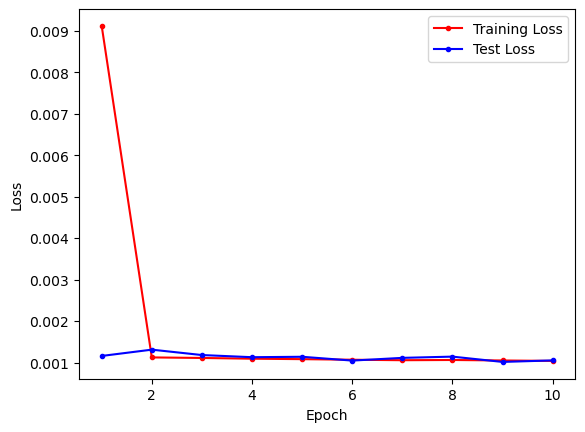

In [19]:
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r.-')
plt.plot(epoch_count, test_loss, 'b.-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# 3.7 To-Predict

In [20]:
topo_3D_norm_trc = np.moveaxis(topo_3D_norm,-1,0) # Re-arrange to time,rol,col

def predict_image(topo_3D_norm_input, im_num,lookback):
    
    def get_x(cn_row, cn_cols,cn_imag,inputmat,lookback):
    
        center_row, center_col, center_image = cn_row,cn_cols,cn_imag
        
        pulled_x = inputmat[center_image-lookback:center_image, center_row-1:center_row+2, center_col-1:center_col+2]

        return pulled_x
    
    images,rows, cols = topo_3D_norm_input.shape
    pred_im_output = np.zeros((rows, cols))
    
    for row in tqdm(range(1,rows-1,1), desc ="predicting"): #range(start, stop, step)
        for col in range(1,cols-1,1):
            
            x_data= get_x(row,col,im_num,topo_3D_norm_input,lookback)
            x_data = np.expand_dims(x_data, axis=3)
            x_data = np.expand_dims(x_data, axis=0)
         
            #make predictions
            pixel_predicted = model.predict(x_data, verbose=0)
            pred_im_output[row,col] = pixel_predicted
            
    return  pred_im_output   

predicting: 100%|██████████| 194/194 [26:41<00:00,  8.25s/it]


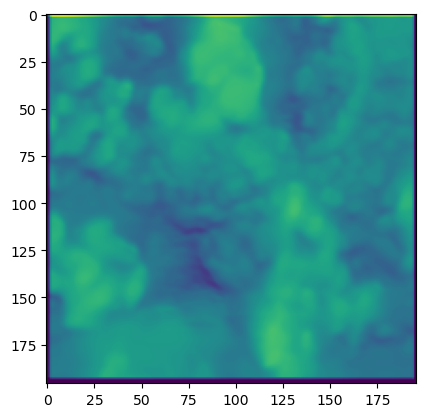

In [22]:
images,rows, cols = topo_3D_norm_trc.shape
pred_im_set_trc = np.zeros((images+2,rows, cols))

lookback = 3 ##if you use the look back 3 you can not predict 0 1 2 

pred_im_set_trc[4,:,:] = predict_image(topo_3D_norm_trc, 4, lookback)
pred_im_set_trc[5,:,:] = predict_image(topo_3D_norm_trc, 5, lookback)
pred_im_set_trc[6,:,:] = predict_image(topo_3D_norm_trc, 6, lookback)

##next step
pred_im_set_trc[7,:,:] = predict_image(pred_im_set_trc, 7, lookback)
pred_im_set_trc[8,:,:] = predict_image(pred_im_set_trc, 8, lookback)
#pred_im_set_trc[9,:,:] = predict_image(pred_im_set_trc, 9, lookback)

plt.imshow(np.squeeze(pred_im_set_trc[7,:,:]))

C:\Users\MMIL\AppData\Local\Temp\ipykernel_28008\3016328982.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout();plt.title(str(image))


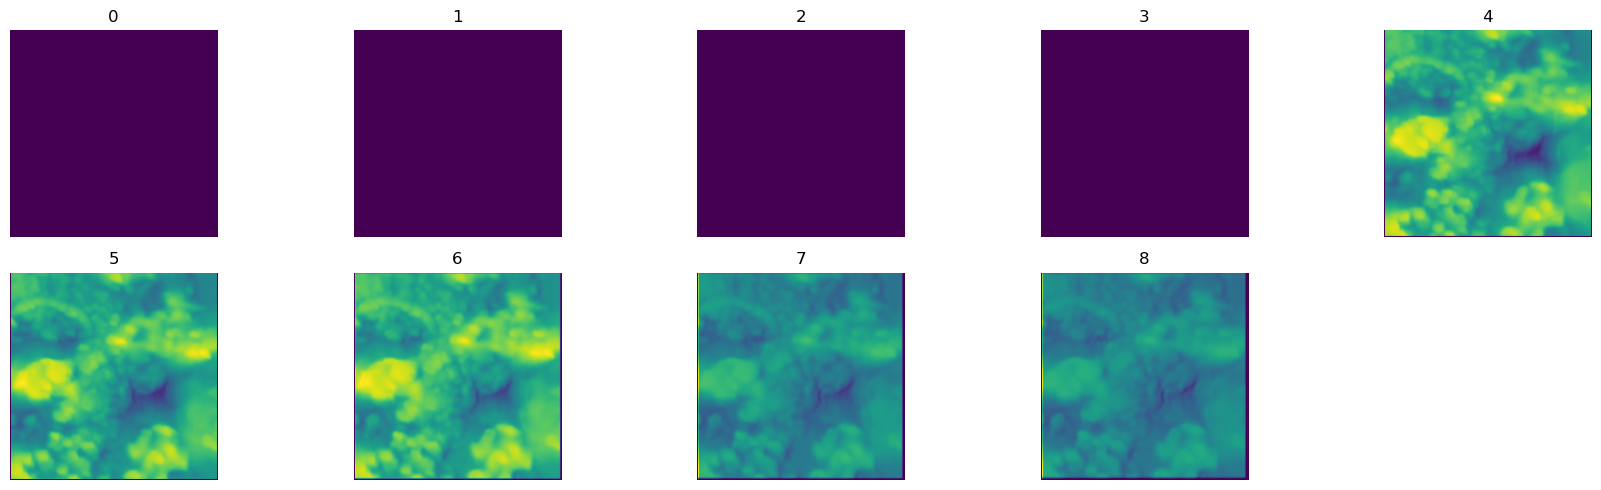

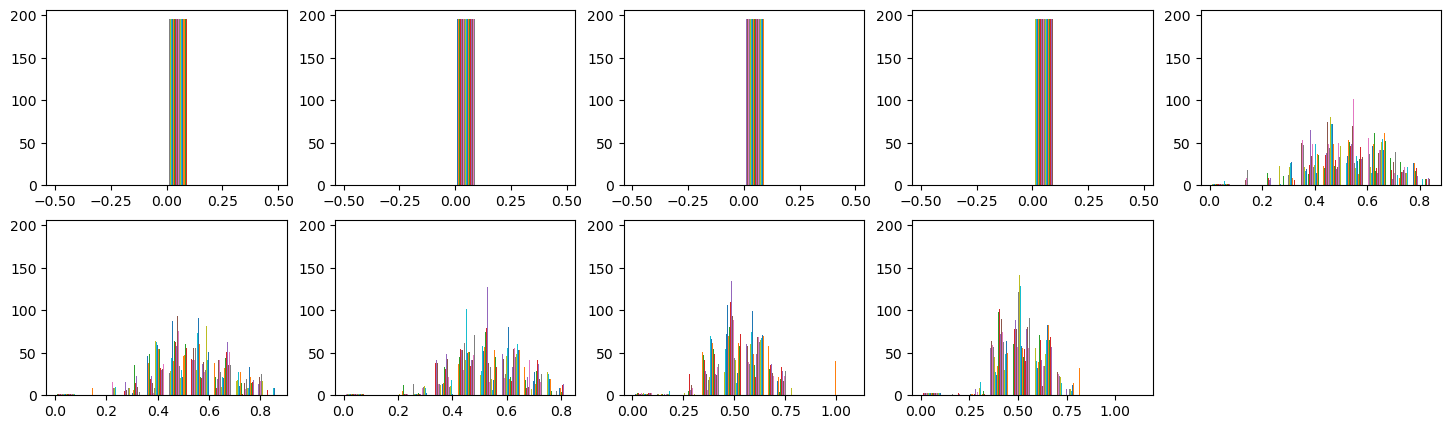

In [23]:
pred_im_set = np.moveaxis(pred_im_set_trc,0,-1)

rows,cols,images = pred_im_set.shape

pred_im_set_rot = np.zeros((rows,cols,images))

for image in range(images):
    image_ex = np.squeeze(np.squeeze(pred_im_set[:,:,image]))
    pred_im_set_rot[:,:,image] =  np.rot90(image_ex, k=1, axes=(0, 1))

def seeimage_ori(n=0):
    image = np.squeeze(np.squeeze(pred_im_set_rot[:,:,n]))

    return image

fig2 = plt.figure(figsize=(18,5)) 
for image in range(images):
    fig2.add_subplot(2,int((images+1)/2), image+1);plt.imshow(seeimage_ori(image));plt.axis('off');
    plt.tight_layout();plt.title(str(image))
    
fig3 = plt.figure(figsize=(18,5)) 
for image in range(images):    
    fig3.add_subplot(2,int((images+1)/2), image+1);plt.hist(seeimage_ori(image));    


Predict_topo = {"Predict_topo": pred_im_set[:,:,:]*absolute_maximum}

#Saving to .mat
sio.savemat(r"C:\Users\MMIL\DP_LSTM\ConvLSTM_dp_steel_data"+"\\"+"Pre_topo_v1c.mat",Predict_topo )

# 3.8 Crop 2 pixel before save

In [24]:
rows,cols,images = pred_im_set_rot.shape
rows_crop,cols_crop,images = rows-4,cols-4,images

pred_im_set_crop = np.zeros((rows_crop,cols_crop,images))

for ro in range(rows_crop):
    for co in range(cols_crop):
          pred_im_set_crop[ro,co] = pred_im_set_rot[ro+2,co+2] 

C:\Users\MMIL\AppData\Local\Temp\ipykernel_28008\2587378551.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout();plt.title(str(image))


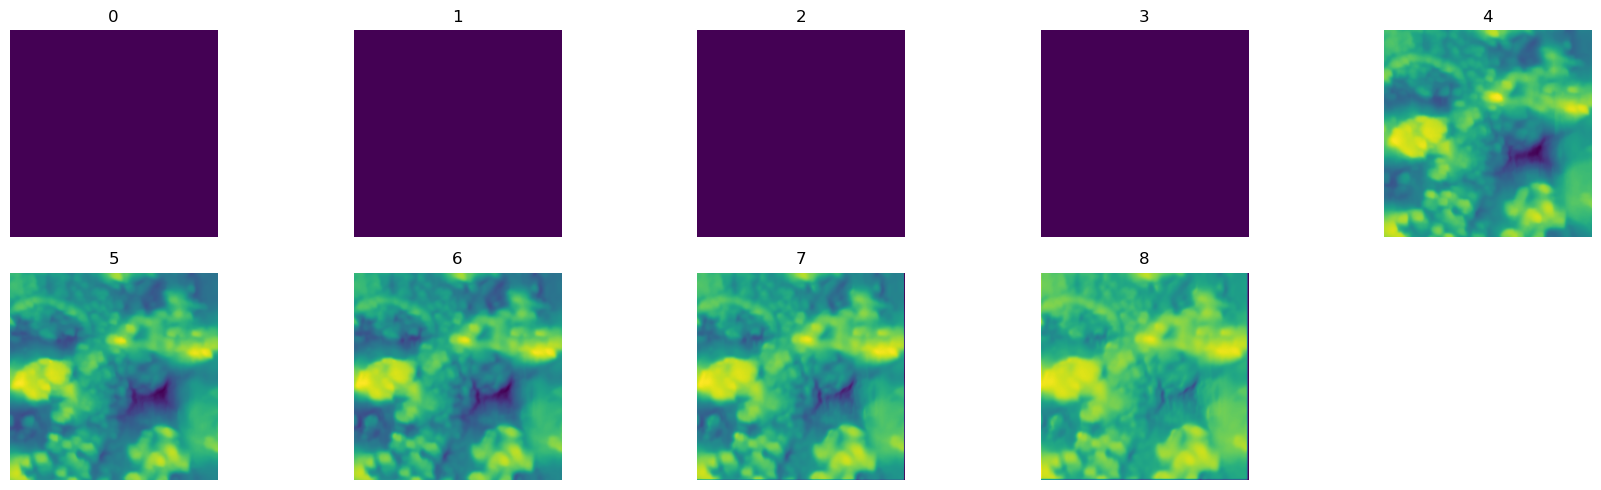

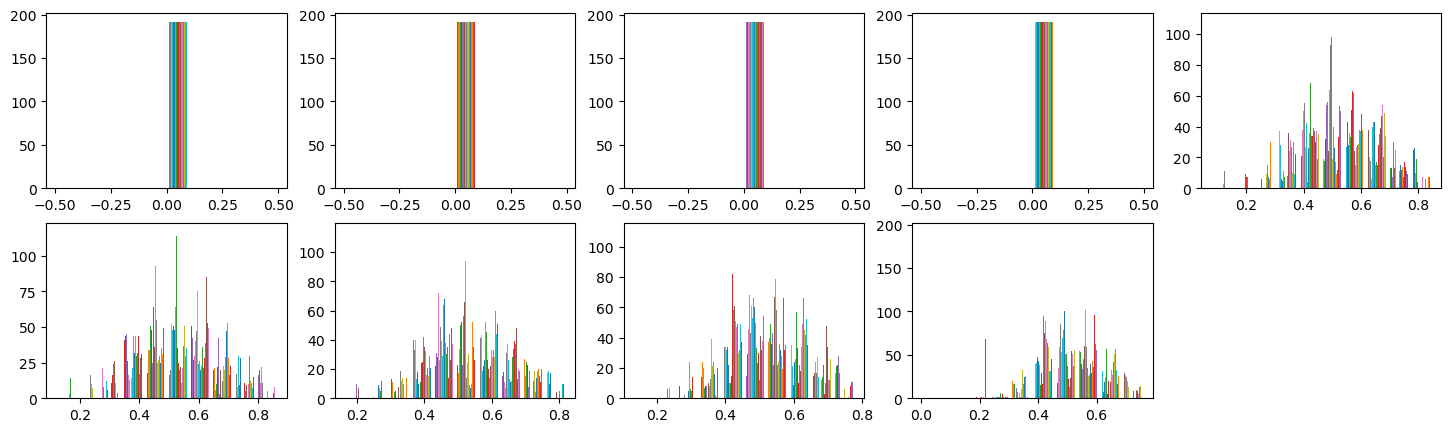

In [25]:
def seeimage_ori(n=0):
    image = np.squeeze(np.squeeze(pred_im_set_crop[:,:,n]))
    return image

fig2 = plt.figure(figsize=(18,5)) 
for image in range(images):
    fig2.add_subplot(2,int((images+1)/2), image+1);plt.imshow(seeimage_ori(image));plt.axis('off');
    plt.tight_layout();plt.title(str(image))
    
fig3 = plt.figure(figsize=(18,5)) 
for image in range(images):    
    fig3.add_subplot(2,int((images+1)/2), image+1);plt.hist(seeimage_ori(image));    

# 3.9  Save file

In [26]:
topo_predby2DLSTM = {"topo_2last_predby2DLSTM": pred_im_set_crop[:,:,:]*absolute_maximum}

#Saving to .mat
sio.savemat(r"C:\Users\MMIL\DP_LSTM\ConvLSTM_dp_steel_data"+"\\"+"topo_predby2DLSTM_lookback3_v10d.mat",topo_predby2DLSTM)